<a href="https://colab.research.google.com/github/davanstrien/flyswot-gym/blob/master/flyswot_gym.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# flyswot-gym 🦾

This notebook moves through the steps involved in training/updating a flyswot model. 

> This notebook assumes you have already updated the flysheet `dataset` (see the [flyswot-gym](https://github.com/davanstrien/flyswot-gym) repository for guidance on doing this.). 

The notebook goes through the following steps:
- downloads the training data
- prepares the dataset for training the model
- training the model 
- evaluating the model
- making a decision about whether to save the model 
- uploading the model to the 🤗 hub

In [ ]:
#@title Setup git and git-lfs
!apt install git-lfs && git init && git lfs install 
!git config --global credential.helper store

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  git-lfs
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 2,129 kB of archives.
After this operation, 7,662 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 git-lfs amd64 2.3.4-1 [2,129 kB]
Fetched 2,129 kB in 2s (867 kB/s)
Selecting previously unselected package git-lfs.
(Reading database ... 155455 files and directories currently installed.)
Preparing to unpack .../git-lfs_2.3.4-1_amd64.deb ...
Unpacking git-lfs (2.3.4-1) ...
Setting up git-lfs (2.3.4-1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Initialized empty Git repository in /content/.git/
Updated git hooks.
Git LFS initialized.


In [ ]:
#@title Install flyswot-gym
!pip -q install git+https://github.com/davanstrien/flyswot-gym.git

     |████████████████████████████████| 325 kB 4.1 MB/s 
     |████████████████████████████████| 431 kB 51.5 MB/s 
     |████████████████████████████████| 229 kB 59.0 MB/s 
     |████████████████████████████████| 4.0 MB 48.5 MB/s 
     |████████████████████████████████| 136 kB 58.1 MB/s 
     |████████████████████████████████| 212 kB 59.4 MB/s 
     |████████████████████████████████| 77 kB 6.6 MB/s 
     |████████████████████████████████| 1.1 MB 30.3 MB/s 
     |████████████████████████████████| 127 kB 11.8 MB/s 
     |████████████████████████████████| 94 kB 3.3 MB/s 
     |████████████████████████████████| 271 kB 42.7 MB/s 
     |████████████████████████████████| 144 kB 76.3 MB/s 
     |████████████████████████████████| 51 kB 8.0 MB/s 
     |████████████████████████████████| 895 kB 64.1 MB/s 
     |████████████████████████████████| 6.5 MB 51.6 MB/s 
     |████████████████████████████████| 596 kB 20.7 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the p

In [ ]:
from huggingface_hub import notebook_login
import torch

### Check for Cuda 


In [ ]:
assert torch.cuda.is_available()

In [ ]:
#@title Define training options
model_checkpoint = 'flyswot/convnext-tiny-224_flyswot' #@param ["flyswot/convnext-tiny-224_flyswot", "davanstrien/deit_flyswot"] {allow-input: true}
training_dataset = "davanstrien/hugit_hmd_flysheet" #@param ["flyswot/flysheet_data"] {allow-input: true}
number_of_epochs = 25 #@param {type:"slider", min:10, max:100, step:1}

# Login to the 🤗 hub 

Since we're using private datasets and we want to have the option of pushing our models to the 🤗 hub we ned to ensure we are logged in.

In [ ]:
notebook_login()

Login successful
Your token has been saved to /root/.huggingface/token


## Setup training data

This part of the notebook setups the training data for our model. The way in which the data is processed changes depending on our model which is why we need to pass in `model_checkpoint`

In [ ]:
from flyswot_gym.core import prep_data

In [ ]:
flyswot_data = prep_data(training_dataset, model_checkpoint=model_checkpoint)

Downloading:   0%|          | 0.00/894 [00:00<?, ?B/s]

Using custom data configuration davanstrien--hugit_hmd_flysheet-08100e1d1377c64b


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Dataset parquet downloaded and prepared to /root/.cache/huggingface/datasets/parquet/davanstrien--hugit_hmd_flysheet-08100e1d1377c64b/0.0.0/0b6d5799bb726b24ad7fc7be720c170d8e497f575d02d47537de9a5bac074901. Subsequent calls will reuse this data.


Preparing dataset...

dropping duplicates...

  0%|          | 0/1600 [00:00<?, ?ex/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

getting ID...

  0%|          | 0/1275 [00:00<?, ?ex/s]

creating train, valid, test splits...

train has 892 examples

valid has 268 examples

test has 115 examples

Downloading:   0%|          | 0.00/266 [00:00<?, ?B/s]

## Model training 

In [ ]:
from flyswot_gym import core

In [ ]:
trainer = core.train_model(flyswot_data,
                           model_checkpoint, 
                           num_epochs=number_of_epochs)

Dataset({
    features: ['image', 'label', 'fpath', 'clean_path', 'id'],
    num_rows: 892
})

/content/output_dir is already a clone of https://huggingface.co/flyswot/flyswot. Make sure you pull the latest changes with `repo.git_pull()`.
Using amp half precision backend
***** Running training *****
  Num examples = 892
  Num Epochs = 1
  Instantaneous batch size per device = 4
  Total train batch size (w. parallel, distributed & accumulation) = 4
  Gradient Accumulation steps = 1
  Total optimization steps = 223


Epoch,Training Loss,Validation Loss,F1
1,No log,0.012043,0.994000


***** Running Evaluation *****
  Num examples = 268
  Batch size = 4
Saving model checkpoint to output_dir/checkpoint-223
Configuration saved in output_dir/checkpoint-223/config.json
Model weights saved in output_dir/checkpoint-223/pytorch_model.bin
Feature extractor saved in output_dir/checkpoint-223/preprocessor_config.json
Feature extractor saved in output_dir/preprocessor_config.json
Several commits (2) will be pushed upstream.


Training completed. Do not forget to share your model on huggingface.co/models =)


Loading best model from output_dir/checkpoint-223 (score: 0.994).


In [ ]:
outputs = trainer.predict(flyswot_data.test_ds)

***** Running Prediction *****
  Num examples = 115
  Batch size = 4


In [ ]:
outputs.metrics

{'test_f1': 1.0,
 'test_loss': 0.0036521870642900467,
 'test_runtime': 1.6744,
 'test_samples_per_second': 68.683,
 'test_steps_per_second': 17.32}

In [ ]:
from flyswot_gym.core import plot_confusion_matrix, print_classification_report

In [ ]:
trainer.model.config.id2label.values()

dict_values(['CONTAINER', 'CONTROL SHOT', 'COVER', 'EDGE + SPINE', 'FLYSHEET', 'OTHER', 'PAGE + FOLIO', 'SCROLL'])

NameError: ignored

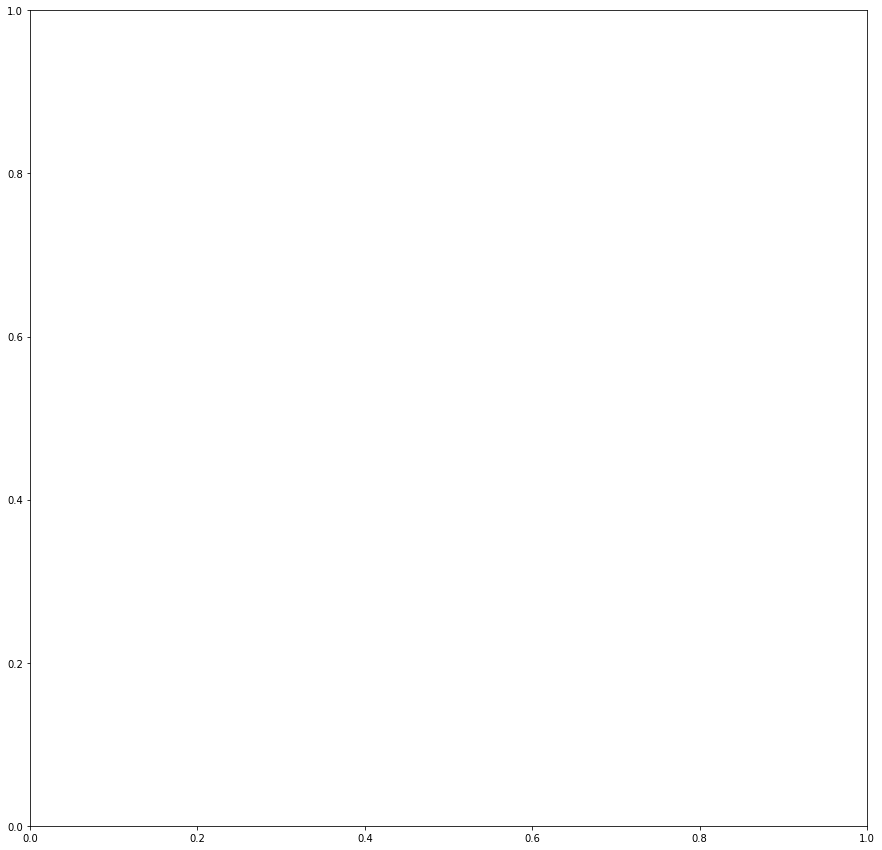

In [ ]:
plot_confusion_matrix(outputs)

In [ ]:
from sklearn.metrics import classification_report
y_true = outputs.label_ids
y_pred = outputs.predictions.argmax(1)
print(classification_report(y_true, y_pred, target_names=train_ds.features['label'].names))

              precision    recall  f1-score   support

   CONTAINER       0.88      1.00      0.93         7
CONTROL SHOT       1.00      1.00      1.00         5
       COVER       1.00      1.00      1.00        19
EDGE + SPINE       1.00      1.00      1.00        17
    FLYSHEET       0.97      1.00      0.98        32
       OTHER       1.00      1.00      1.00         5
PAGE + FOLIO       1.00      0.96      0.98        27
      SCROLL       1.00      0.67      0.80         3

    accuracy                           0.98       115
   macro avg       0.98      0.95      0.96       115
weighted avg       0.98      0.98      0.98       115



In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame({"y_true":y_true,"y_pred": y_pred})

In [ ]:
df.y_true = df.y_true.map(id2label)
df.y_pred = df.y_pred.map(id2label)

In [ ]:
df[df.y_true != df.y_pred]

,y_true,y_pred
33,SCROLL,CONTAINER
38,PAGE + FOLIO,FLYSHEET


show images where the prediction is wrong 

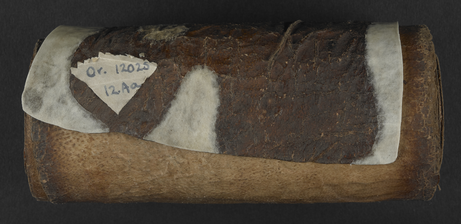

In [ ]:
test_ds[33]['image']

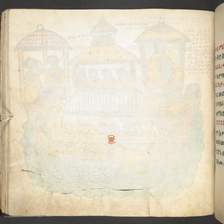

In [ ]:
test_ds[38]['image']

Push to hub?